<a href="https://colab.research.google.com/github/Lfagundesnetto/MVP1_Sprint_1_PUC_2023_Leticia-Netto/blob/main/MVP1_LeticiaNetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Sprint I**
*Leticia Fagundes Netto*

---
## Overview: Suícidios no Brasil


##**Definições da Análise**

**O Problema**

O trabalho busca realizar uma análise exploratória sobre o suicídio.

Analisando o comportamento histório desse problema no Brasil e como ele difere e/ou se assemelha aos dados globais. 

---
**Aprendizado Não Supervisionado**

Como, nesse primeiro momento, se trata de uma Análise Exploratória, o aprendizado da pesquisa é o ***Não Supervisionado***.

Ou seja, não existem saídas desejadas a serem estimadas. O aprendizado explora os dados afim de identificar como eles se relacionam.

### **Dataset: Base de Dados**

**Dataset:** [Suicide Rates Overview (1985 to 2021)](https://www.kaggle.com/datasets/omkargowda/suicide-rates-overview-1985-to-2021)

Fonte: Site Kaggle 
 
*Dataset Original: [Suicide Rates Overview 1985 to 2016](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016)* 

*Base original do Dataset usado (que está mais atualizado)* 
 
*License: [World Bank Dataset Terms of Use](https://www.worldbank.org/en/about/legal/terms-of-use-for-datasets)*


In [159]:
#Importa pacotes
import numpy as np
import pandas as pd               
import matplotlib.pyplot as plt   
import seaborn as sns             

%matplotlib inline

#Importa dataset salvo no github
df = pd.read_csv("https://raw.githubusercontent.com/Lfagundesnetto/MVP1_Sprint_1_PUC_2023_Leticia-Netto/main/dataset_suicide_rates_85_21.csv")


     

## **Análise dos Dados**

**Atributos do Dataset**

*   Country (País)

*   Year (Ano)

*   Sex (Sexo)

*   Age (Idade)

*   Suicides_no (Número de Suicídios)

*   Population (População)

*   Suicides/100K population (Suícidios/100K População)

*   Country-Year Key (ID: País-Ano)

*   HDI for Year (IDH Anual)

*   GDP for Year (PIB Anual)

*   GDP per Capita (PIB per Capita)

*   Generation (Geração)









In [160]:
#Dimensões da Base
df.shape #(31756, 12)

#Informações da Base - Colunas / Tipo de Dados (Sumário)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


*Tipos de Dados presente na Base: Float ou Pontos Flutuantes (números reais), Inteiros (números inteiros) e Strings  (sequência de: letras, números, símbolos)*


In [161]:
# 5 Primeiras Linhas da Base
df.head(5)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [162]:
df.isnull().sum()  #identifica as linhas nulas por coluna



country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [163]:
#Checando por dados duplicados
print(df.duplicated().sum())

0


### Formatação dos Dados

In [164]:
#Renomear Colunas
df.columns=['Country','Year','Gender','Age','SuicidesNo','Population','Suicides/100KPop','CountryYear','HDIForYear','GdpForYear','GdpPerCapita','Generation']

In [165]:
#Substituir null por zero
df['SuicidesNo']=df['SuicidesNo'].fillna(0)

#Remover Coluna: HDI for year
df.drop('HDIForYear', axis='columns', inplace=True)


In [166]:
#Substituir Float por Números Inteiros
df['SuicidesNo']=df['SuicidesNo'].astype(int)

df['GdpPerCapita']=df['GdpPerCapita'].astype(int)


In [167]:
#Tipos de Dados (Sumário)
df.dtypes

Country              object
Year                  int64
Gender               object
Age                  object
SuicidesNo            int64
Population            int64
Suicides/100KPop    float64
CountryYear          object
GdpForYear           object
GdpPerCapita          int64
Generation           object
dtype: object

In [168]:
df.head(5)

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides/100KPop,CountryYear,GdpForYear,GdpPerCapita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,15,66,24,900",796,Boomers


### **DataFrame - Brasil**

Filtrando os dados brasileiros.
Criação de uma base exclusivamente brasileira

In [169]:
df_br = df[df['Country']=='Brazil']

#Dimensões da Base Brasileira
df_br.shape   #(420, 11)

(420, 11)

In [170]:
df_br.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 4172 to 31681
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           420 non-null    object 
 1   Year              420 non-null    int64  
 2   Gender            420 non-null    object 
 3   Age               420 non-null    object 
 4   SuicidesNo        420 non-null    int64  
 5   Population        420 non-null    int64  
 6   Suicides/100KPop  420 non-null    float64
 7   CountryYear       420 non-null    object 
 8   GdpForYear        420 non-null    object 
 9   GdpPerCapita      420 non-null    int64  
 10  Generation        420 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 39.4+ KB


## **Análise Descritiva**

In [171]:
#Descrição da Base Global

df.describe()


,Year,SuicidesNo,Population,Suicides/100KPop,GdpPerCapita
count,31756.000000,31756.000000,3.175600e+04,31756.000000,31756.000000
mean,2003.395390,228.175305,7.217454e+06,11.716668,17588.893312
std,9.760604,852.598398,5.799323e+07,21.590926,19464.845704
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1996.000000,2.000000,1.288210e+05,0.370000,3765.000000
50%,2004.000000,22.000000,5.468325e+05,4.285000,10062.000000
75%,2011.000000,123.000000,2.908763e+06,14.560000,25622.000000
max,2020.000000,22338.000000,1.411100e+09,515.092734,126352.000000


In [172]:
#Descrição da Base Brasileira

df_br.describe()

,Year,SuicidesNo,Population,Suicides/100KPop,GdpPerCapita
count,420.000000,420.000000,4.200000e+02,420.000000,420.000000
mean,2002.114286,609.473810,3.566643e+07,5.211175,6388.800000
std,10.290589,649.538556,6.333859e+07,5.580818,3610.906707
min,1985.000000,0.000000,6.556210e+05,0.000000,1898.000000
25%,1993.000000,86.250000,9.971504e+06,0.715592,3376.000000
50%,2002.000000,352.000000,1.585745e+07,2.555000,5313.000000
75%,2011.000000,970.500000,1.779748e+07,9.120000,9283.000000
max,2020.000000,3238.000000,2.131963e+08,23.920000,14245.000000


## **Grupos de Dados**

In [173]:
#Total Suicidios da Base Global
t_scd=df['SuicidesNo'].sum()

#Total Suicidios da Base Brasileira
tbr_scd=df_br['SuicidesNo'].sum()

#Agrupando número de suícidios por Ano
grp_year = df.groupby(['Year']).SuicidesNo.sum()

#Agrupando número de suícidios por Gênero
grp_gender = df.groupby(['Gender']).SuicidesNo.sum()

#Agrupando número de suícidios por Faixa Etária
grp_age = df.groupby(['Age']).SuicidesNo.sum()

#Agrupando número de suícidios por Gênero e Ano
ygrp_gender = df.groupby(['Gender', 'Year']).SuicidesNo.sum()

#Agrupando número de suícidios por Faixa Etária e Ano
ygrp_age = df.groupby(['Age','Year']).SuicidesNo.sum()

#Agrupando número de suícidios por Country
grp_cnty = df.groupby(['Country']).SuicidesNo.sum()

#Agrupando número de suícidios por Country e Ano
ygrp_cnty = df.groupby(['Country','Year']).SuicidesNo.sum()

#Total População da Base Global
pop_total=df['Population'].sum()

#Total População da Base Brasileira
popbr_total=df_br['Population'].sum()

#Total População da Base Global por Ano
ypop_total=df.groupby(['Year']).Population.sum()

#Total População da Base Brasileira por Ano
ypopbr_total=df_br.groupby(['Year']).Population.sum()



## **Global Overview**

<Axes: title={'center': 'Suicídios por Ano'}, xlabel='Year'>

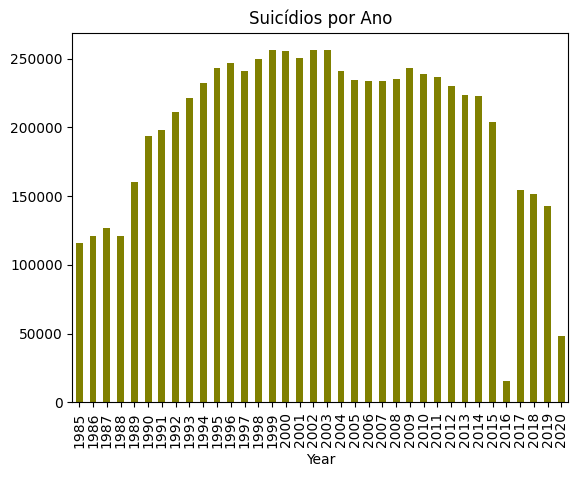

In [202]:
#Suicidios Anuais
grp_year.plot.bar(title='Suicídios por Ano',color=['olive'])

<Axes: title={'center': 'Porcentagem: Suicidios sobre a População.'}, xlabel='Year'>

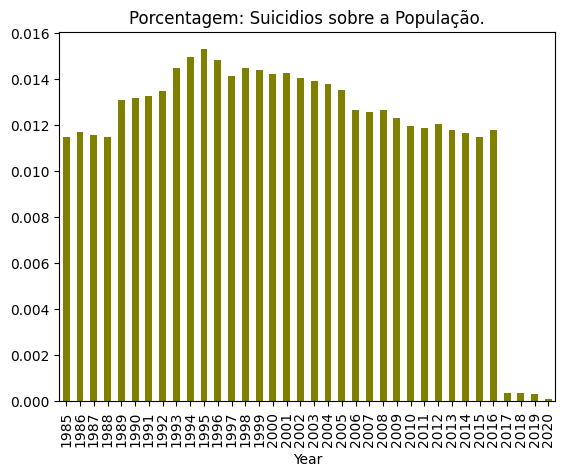

In [201]:
#calculando porcentagem por ano
pyr = 100*grp_year / ypop_total

#plotando gráfico de barras
pyr.plot.bar(title='Porcentagem: Suicidios sobre a População.', color=['olive'])

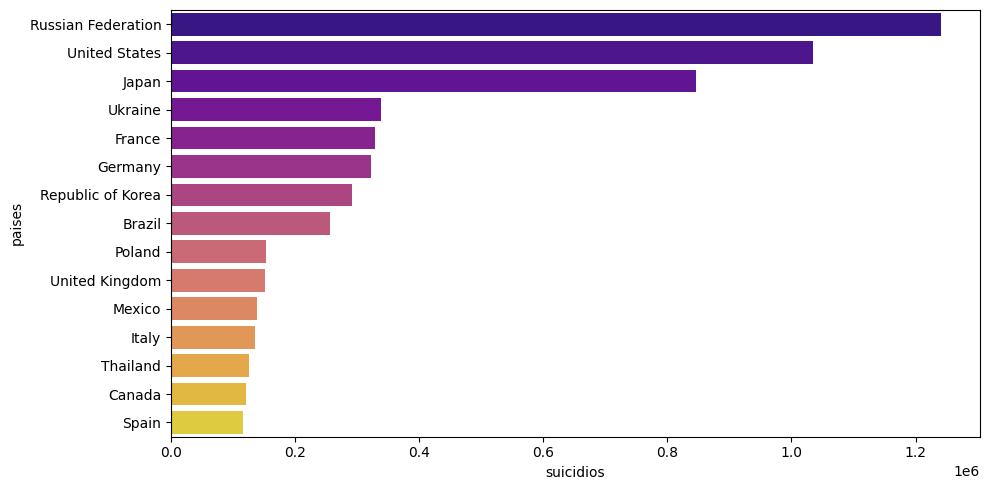

In [192]:
# PAÍSES COM MAIORES NÚMEROS DE SUICÍDIOS POR 100 MIL HABITANTES

suicidios = []
for paises in df.Country.unique():
    suicidios.append(sum(df[df['Country'] == paises].SuicidesNo))

suicidios = pd.DataFrame(suicidios, columns = ['suicidios'])
paises = pd.DataFrame(df.Country.unique(), columns=['paises'])
SuicidesNo = pd.concat([suicidios, paises], axis = 1)

SuicidesNo = SuicidesNo.sort_values(by = 'suicidios', ascending = False)

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(y = SuicidesNo.paises[:15], x = SuicidesNo.suicidios[:15], palette='plasma')

plt.tight_layout()

### **Gênero**

<Axes: title={'center': 'Porcentagem de Suicídios por Sexo.'}, ylabel='SuicidesNo'>

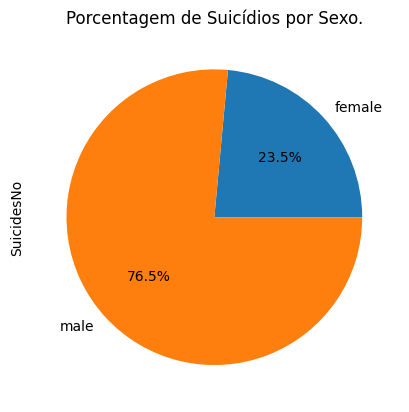

In [176]:
#calculando porcentagem por genero
pgnd = (grp_gender / t_scd)

#plotando gráfico de genero
pgnd.plot.pie(autopct='%1.1f%%', title='Porcentagem de Suicídios por Sexo.')
